##  <p align="center" style="background-color:#16A085; font-family:newtimeroman; color:#FFF9ED; font-size:125%; border-radius:10px 10px;">Step 1 : IMPORTS</p>


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv('/Users/anilfurkanembel/Desktop/Raw Datas/movies_metadata.csv', low_memory=False)

##  <p align="center" style="background-color:#16A085; font-family:newtimeroman; color:#FFF9ED; font-size:125%; border-radius:10px 10px;">Step 2 :  EDA(Exploratory Data Analysis) </p>



We drop empty and duplicate data

In [4]:
df = df[~df["title"].duplicated(keep='last')]
df = df[~df["title"].isna()]
df = df[~df["overview"].isna()]

We should remove the stop words in the text

**Stop Words**

Stop words are common words that are often removed from text during natural language processing because they are not considered to be meaningful in determining the overall meaning of a sentence or document. Stop words include words such as "the", "a", "an", "and", "in", "of", "to", "that", "it", and "for".

# Creating the TF-IDF Matrix



In [5]:
tfidf = TfidfVectorizer(stop_words="english")

tfidf_matrix = tfidf.fit_transform(df['overview'])

print(tfidf_matrix.shape)

(41344, 73955)


Shape: (41344, 73955)

41344:  Overviews so Movies

73955: Words

Value: TF-IDF Scores


In [6]:
## tfidf_matrix.toarray() # TF-IDF Scores

In [7]:
tfidf_matrix = tfidf_matrix.astype(np.float32) # it's too big so it's very difficult to process so i halved the size

# Creating the Cosine Similarity Matrix

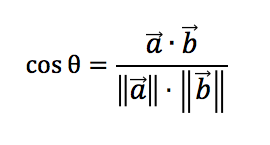

Cosine similarity is one of the metric to measure the text-similarity between two documents irrespective of their size in Natural language Processing. A word is represented into a vector form. The text documents are represented in n-dimensional vector space.


In [8]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

print(cosine_sim.shape)
cosine_sim[1]

shape: (41344, 41344) 

41344: movies

# Making Suggestions Based on Similarities

In [ ]:
indices = pd.Series(df.index, index=df['title'])

In [ ]:
movie_index = indices["Deadpool"]

cosine_sim[movie_index]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
similarity_scores = pd.DataFrame(cosine_sim[movie_index], columns=["score"])
similarity_scores

,score
0,0.000000
1,0.000000
2,0.000000
3,0.008761
4,0.025076
...,...
41339,0.000000
41340,0.038174
41341,0.000000
41342,0.000000


All similarity scores of Toy Story movie and other movies.

In [ ]:
print(similarity_scores.sort_values("score", ascending=False)[1:11].index)
movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index

Int64Index([29189, 26559, 24579, 8601, 15219, 37401, 19420, 26566, 22233,
            23821],
           dtype='int64')


In [ ]:
df['title'].iloc[movie_indices]

32570                       Hero's Island
29680              Barbie: A Fairy Secret
27537         Barbie: A Fashion Fairytale
9944                        First Desires
17296                       Your Highness
41318    7 Days of Himawari & Her Puppies
21874                     Bloody New Year
29687     Barbie and the Three Musketeers
24967         An Empress and the Warriors
26728              Return to Nim's Island
Name: title, dtype: object

That's it, if you like Toy Story movie, here are 10 similar movies for you :D

Don't forget to vote :)